## Wine Quality Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

C:\Users\sujal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


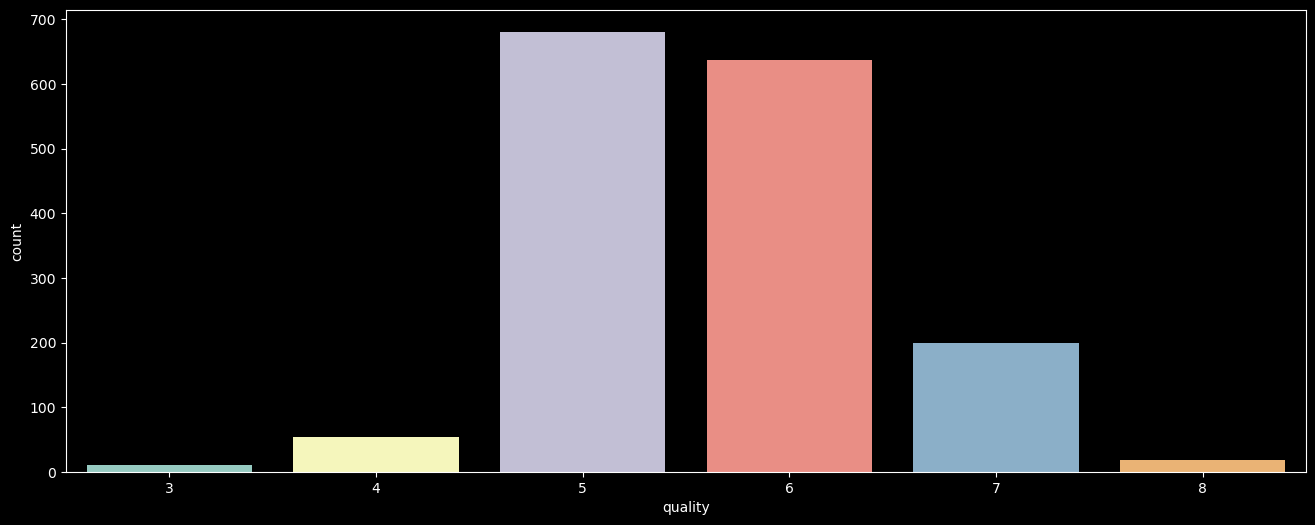

In [5]:
plt.figure(figsize = (16,6))
sns.countplot(df['quality'])
plt.show()

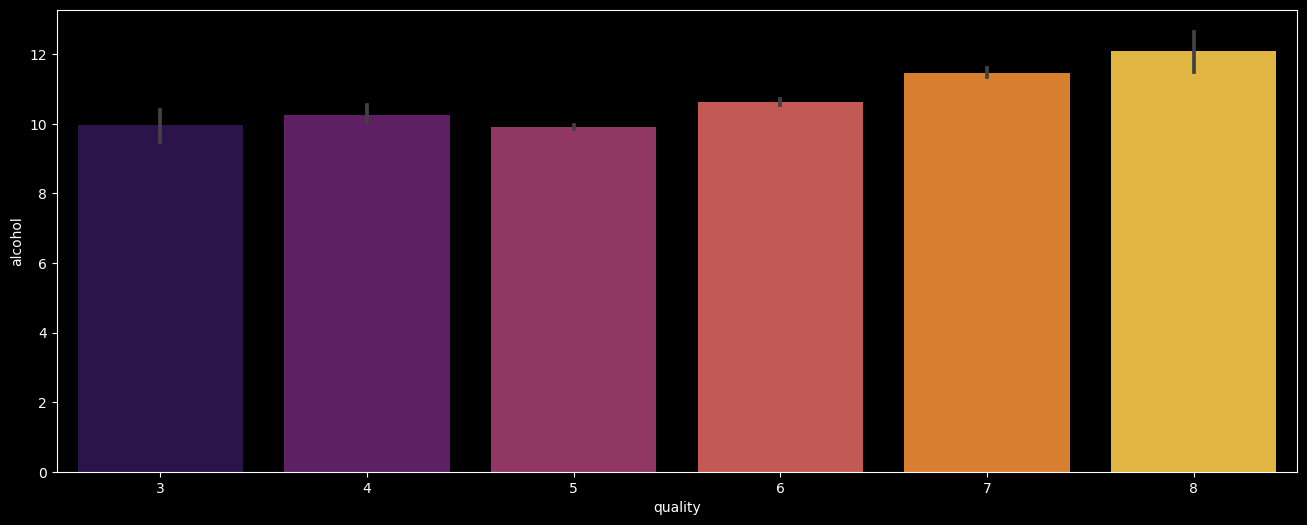

In [6]:
plt.figure(figsize = (16,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'inferno')
plt.show()

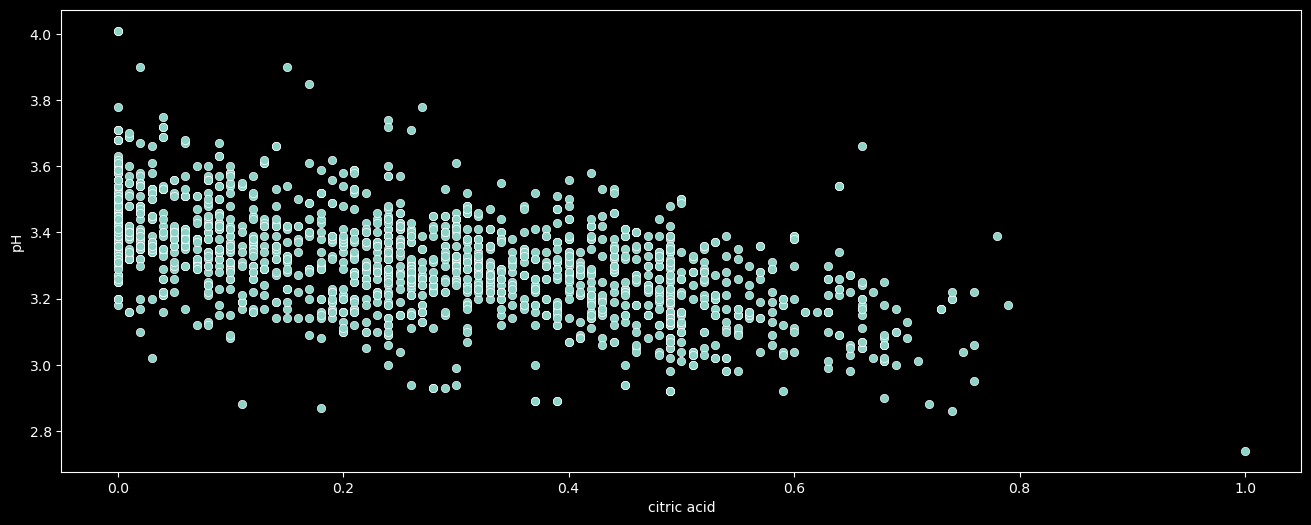

In [7]:
plt.figure(figsize = (16,6))
sns.scatterplot(x='citric acid', y = 'pH', data = df)
plt.show()

<Figure size 1600x600 with 0 Axes>

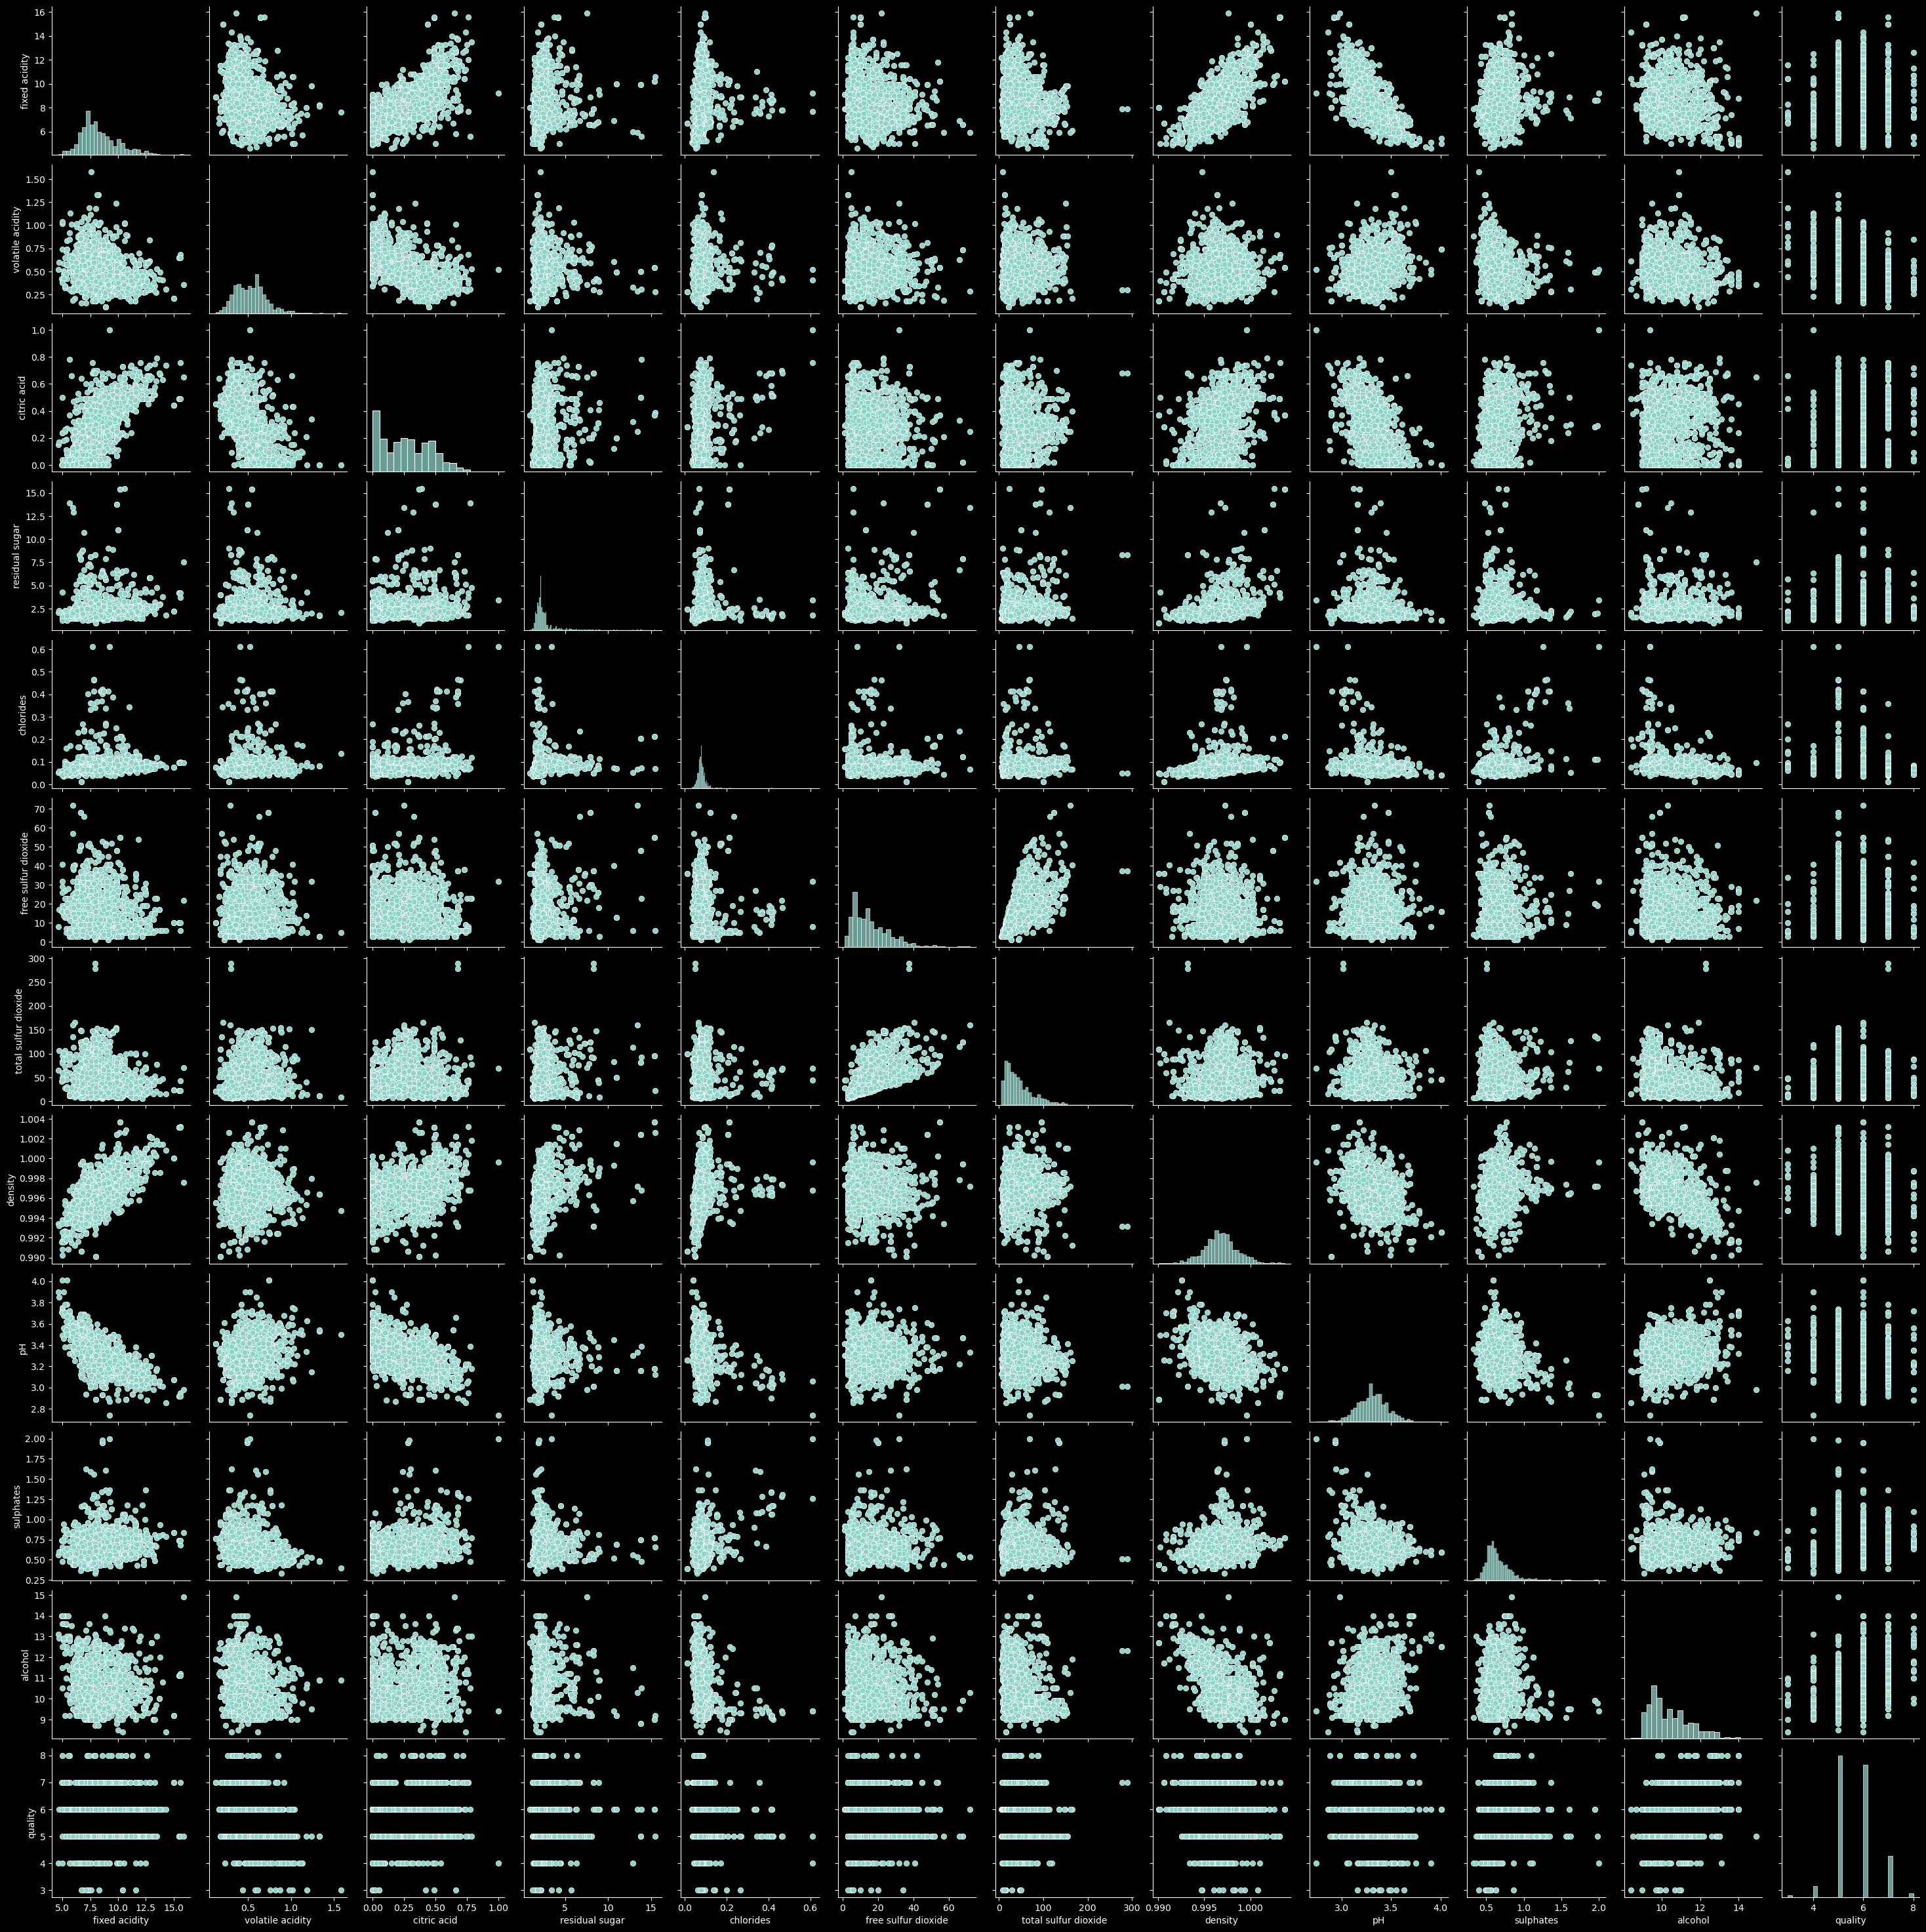

In [8]:
plt.figure(figsize = (16,6))
sns.pairplot(df)
plt.show()

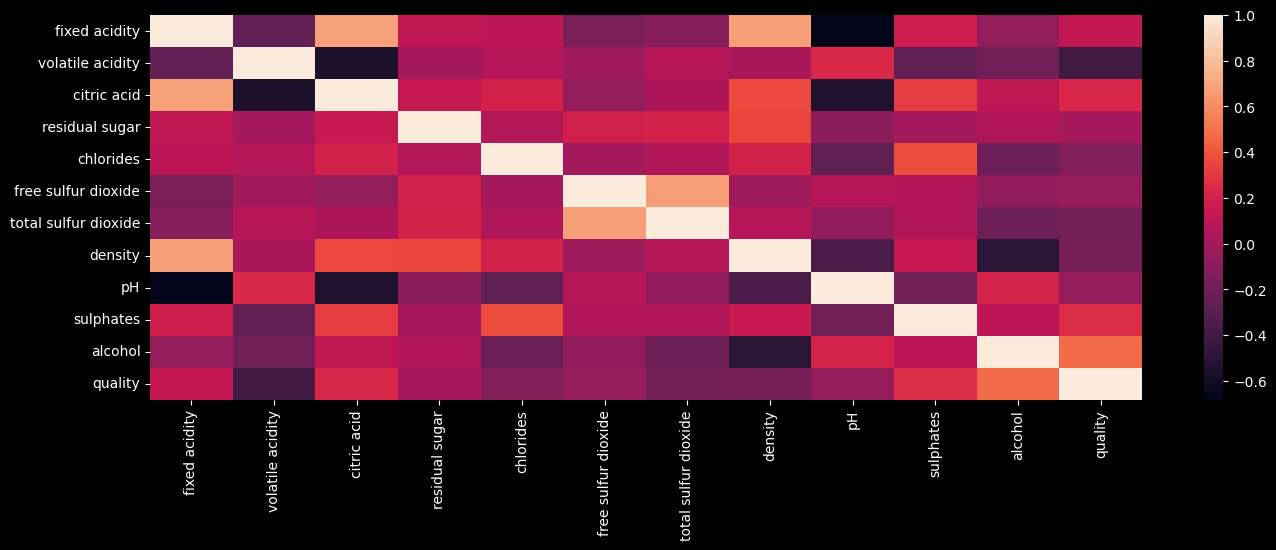

In [9]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr())
plt.show()

In [10]:
x = df.drop(['quality'], axis=1)
y = df['quality']

## Data preprocessing

In [11]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
x_res,y_res =(x, y)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.30, random_state=3)

In [13]:
from sklearn.preprocessing import StandardScaler

stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

In [14]:
from sklearn.metrics import accuracy_score

## logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std, y_train)
predictions = lr.predict(x_test_std)
accuracy_score(y_test, predictions)

0.6

## Decision Tree classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_std, y_train)
accuracy_score(y_test, dt.predict(x_test_std))

0.63125

## Random forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train_std, y_train)
accuracy_score(y_test, rf.predict(x_test_std))

0.7166666666666667

In [18]:
y_test.shape

(480,)

In [19]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [20]:
regressor.intercept_

-7.992582123605601